# LSTM Time Series Forecasting for NAB random signal

In [1]:
from tensorflow import keras

## Dataset

https://archive.ics.uci.edu/ml/datasets/Air+quality#

In [2]:
import pandas as pd
import numpy as np

df_raw = pd.read_csv("datasets/NAB-art_daily_small_noise.csv")

In [3]:
df_raw.head()

,timestamp,value
0,2014-04-01 00:00:00,18.324919
1,2014-04-01 00:05:00,21.970327
2,2014-04-01 00:10:00,18.624806
3,2014-04-01 00:15:00,21.953684
4,2014-04-01 00:20:00,21.909120


In [4]:
df_raw.isna().sum()

timestamp    0
value        0
dtype: int64

In [5]:
df = df_raw.dropna()
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [6]:
df.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


In [7]:
df.columns

Index(['timestamp', 'value'], dtype='object')

In [8]:
df["timestamp"] 

0      2014-04-01 00:00:00
1      2014-04-01 00:05:00
2      2014-04-01 00:10:00
3      2014-04-01 00:15:00
4      2014-04-01 00:20:00
               ...        
4027   2014-04-14 23:35:00
4028   2014-04-14 23:40:00
4029   2014-04-14 23:45:00
4030   2014-04-14 23:50:00
4031   2014-04-14 23:55:00
Name: timestamp, Length: 4032, dtype: datetime64[ns]

## Visualize Data

In [9]:
%matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9.5, 6]

<IPython.core.display.Javascript object>


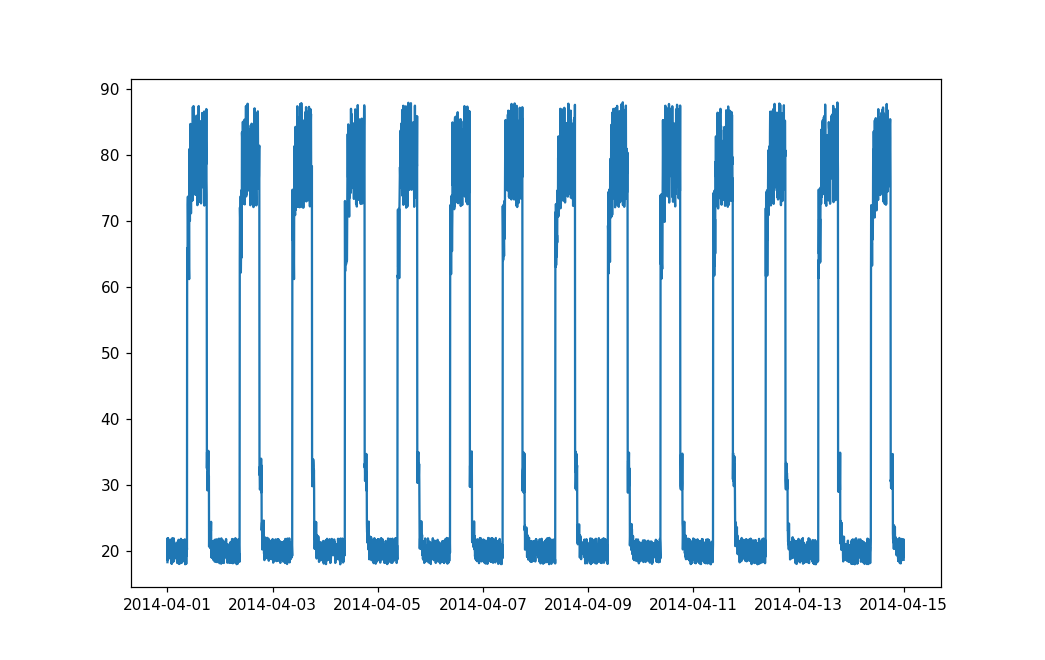

In [102]:
figure = plt.figure()

plt.plot(df["timestamp"], df["value"])

## Normalize Data

In [232]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [238]:
scaler.fit(df["value"].values.reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [242]:
scaled_data = scaler.transform(df["value"].values.reshape(-1,1))

In [243]:
scaled_data

array([[0.00462956],
       [0.05672531],
       [0.00891519],
       ...,
       [0.01473613],
       [0.05427407],
       [0.0097414 ]])

In [244]:
df["scaled"] = scaled_data

In [245]:
df

,timestamp,value,scaled
0,2014-04-01 00:00:00,18.324919,0.004630
1,2014-04-01 00:05:00,21.970327,0.056725
2,2014-04-01 00:10:00,18.624806,0.008915
3,2014-04-01 00:15:00,21.953684,0.056487
4,2014-04-01 00:20:00,21.909120,0.055851
...,...,...,...
4027,2014-04-14 23:35:00,20.211195,0.031586
4028,2014-04-14 23:40:00,20.531041,0.036157
4029,2014-04-14 23:45:00,19.032127,0.014736
4030,2014-04-14 23:50:00,21.798801,0.054274


## Split Dataset
Use the Keras TimeseriesGenerator to transform the dataframe into training and testing portions

In [11]:
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [246]:
input_length = 40
batch_size = 10
generator = TimeseriesGenerator(df['scaled'], df['scaled'], length=input_length, batch_size=batch_size)
len(generator)

400

In [247]:
generator[0]

(array([[0.00462956, 0.05672531, 0.00891519, 0.05648747, 0.05585061,
         0.04536336, 0.03768091, 0.03301549, 0.04949531, 0.01653149,
         0.02672035, 0.0353925 , 0.02349116, 0.02442269, 0.01886633,
         0.03223948, 0.04860773, 0.01150622, 0.05340135, 0.03937664,
         0.0470471 , 0.03177983, 0.04454584, 0.00091229, 0.04676742,
         0.00228069, 0.05085646, 0.05668993, 0.01679604, 0.01200869,
         0.0437368 , 0.01445   , 0.04946449, 0.00586503, 0.00718622,
         0.0559576 , 0.03850497, 0.04839696, 0.01852591, 0.03865616],
        [0.05672531, 0.00891519, 0.05648747, 0.05585061, 0.04536336,
         0.03768091, 0.03301549, 0.04949531, 0.01653149, 0.02672035,
         0.0353925 , 0.02349116, 0.02442269, 0.01886633, 0.03223948,
         0.04860773, 0.01150622, 0.05340135, 0.03937664, 0.0470471 ,
         0.03177983, 0.04454584, 0.00091229, 0.04676742, 0.00228069,
         0.05085646, 0.05668993, 0.01679604, 0.01200869, 0.0437368 ,
         0.01445   , 0.04946449, 

In [248]:
generator[1]

(array([[0.02672035, 0.0353925 , 0.02349116, 0.02442269, 0.01886633,
         0.03223948, 0.04860773, 0.01150622, 0.05340135, 0.03937664,
         0.0470471 , 0.03177983, 0.04454584, 0.00091229, 0.04676742,
         0.00228069, 0.05085646, 0.05668993, 0.01679604, 0.01200869,
         0.0437368 , 0.01445   , 0.04946449, 0.00586503, 0.00718622,
         0.0559576 , 0.03850497, 0.04839696, 0.01852591, 0.03865616,
         0.03395495, 0.03446418, 0.03900192, 0.03287556, 0.02451278,
         0.01575883, 0.04392074, 0.01292067, 0.03956337, 0.01332426],
        [0.0353925 , 0.02349116, 0.02442269, 0.01886633, 0.03223948,
         0.04860773, 0.01150622, 0.05340135, 0.03937664, 0.0470471 ,
         0.03177983, 0.04454584, 0.00091229, 0.04676742, 0.00228069,
         0.05085646, 0.05668993, 0.01679604, 0.01200869, 0.0437368 ,
         0.01445   , 0.04946449, 0.00586503, 0.00718622, 0.0559576 ,
         0.03850497, 0.04839696, 0.01852591, 0.03865616, 0.03395495,
         0.03446418, 0.03900192, 

In [250]:
input_length = 40
batch_size = 10
num_features = 1

X = df['scaled'].values.reshape(df['scaled'].shape[0], 1)

generator = TimeseriesGenerator(X, X, length=input_length, batch_size=batch_size)
len(generator)

400

## Create Model

In [252]:
from keras import Sequential
from keras.layers import Dense, LSTM, TimeDistributed
from keras.optimizers import RMSprop, Adam

In [276]:
model = Sequential()
model.add(LSTM(100, input_shape=(input_length, num_features), return_sequences=True))
model.add(LSTM(100, input_shape=(input_length, num_features)))
model.add(Dense(num_features, activation='relu'))
optimizer = Adam()
model.compile(loss='mse', optimizer=optimizer)
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_37 (LSTM)               (None, 40, 100)           40800     
_________________________________________________________________
lstm_38 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [277]:
model.fit_generator(generator, steps_per_epoch=len(generator), epochs=5)

Epoch 1/5
400/400 [==============================] - 22s 54ms/step - loss: 0.0196
Epoch 2/5
400/400 [==============================] - 21s 53ms/step - loss: 0.0105
Epoch 3/5
400/400 [==============================] - 21s 53ms/step - loss: 0.0086
Epoch 4/5
400/400 [==============================] - 21s 53ms/step - loss: 0.0075
Epoch 5/5
400/400 [==============================] - 21s 53ms/step - loss: 0.0073


## Predict and Create Forecast
Use the entire history to forecast the next data point. Then add that to the history and repeat to generate the 2nd future data point... etc.

In [278]:
steps_to_predict = 300

prediction_timestamps = []
prediction_values = []
start_values = df['scaled'].iloc[-40:].copy()
start_times = df['timestamp'].iloc[-40:].copy()

for i in range(steps_to_predict):
    
    next_value = model.predict(start_values[-40:].values.reshape(1,40,1))
    start_values = start_values.append(pd.Series(next_value[0]), ignore_index=True)
    
    next_time = start_times[-1:].values + pd.Timedelta(seconds=60*5)
    start_times = start_times.append(pd.Series(next_time[0]), ignore_index=True)


In [279]:
start_values

0      0.019628
1      0.029930
2      0.054523
3      0.019484
4      0.031343
         ...   
335    1.440170
336    1.440170
337    1.440170
338    1.440170
339    1.440170
Length: 340, dtype: float64

In [280]:
start_times

0     2014-04-14 20:40:00
1     2014-04-14 20:45:00
2     2014-04-14 20:50:00
3     2014-04-14 20:55:00
4     2014-04-14 21:00:00
              ...        
335   2014-04-16 00:35:00
336   2014-04-16 00:40:00
337   2014-04-16 00:45:00
338   2014-04-16 00:50:00
339   2014-04-16 00:55:00
Length: 340, dtype: datetime64[ns]

## Visualize Forecast

<IPython.core.display.Javascript object>


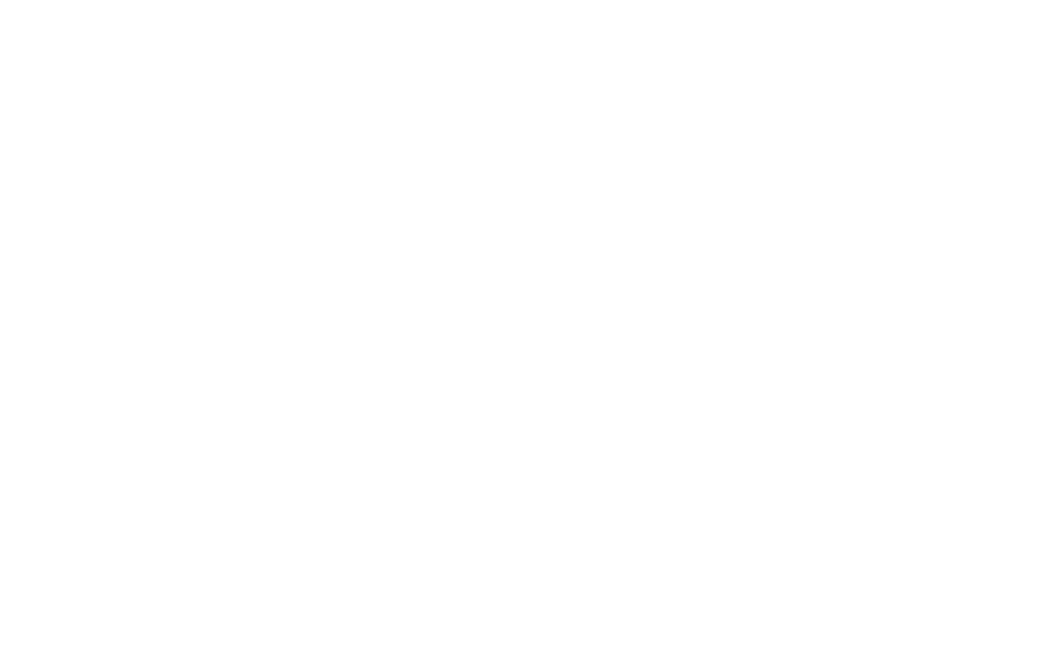

ValueError: Expected 2D array, got 1D array instead:
array=[0.01962785 0.02992988 0.05452252 0.01948432 0.03134327 0.04752115
 0.02152382 0.03810788 0.01532942 0.00749769 0.04684841 0.00690546
 0.01680842 0.05033631 0.02112128 0.05711026 0.05629162 0.01558339
 0.00257786 0.04057549 0.02603772 0.00599805 0.04071622 0.00201693
 0.0500241  0.00816659 0.0075177  0.01028479 0.05493799 0.03966696
 0.04585332 0.02277004 0.01926399 0.01344203 0.02751624 0.03158593
 0.03615678 0.01473613 0.05427407 0.0097414  0.04010616 0.04591785
 0.05546582 0.06652772 0.07873266 0.09203348 0.10649118 0.12222493
 0.13937867 0.15811038 0.17857072 0.20089298 0.22519571 0.25156543
 0.28006107 0.31071594 0.34352517 0.37845469 0.4154354  0.45435709
 0.49506772 0.53737879 0.58106029 0.6258412  0.67142206 0.71747011
 0.76364005 0.80957371 0.85491604 0.89932323 0.94247854 0.98409641
 1.02393293 1.06178832 1.09751081 1.13099611 1.16218674 1.19106686
 1.21765912 1.2420162  1.26421821 1.28436363 1.30256557 1.31894743
 1.333637   1.34676433 1.35845816 1.36884403 1.3780421  1.38616681
 1.39332533 1.3996172  1.40513456 1.40996206 1.41417694 1.4178493
 1.42104232 1.42381299 1.42621219 1.42828584 1.43007469 1.43161464
 1.4329375  1.43407178 1.43504226 1.43587089 1.43657672 1.43717682
 1.43768585 1.43811643 1.4384799  1.43878555 1.43904197 1.43925667
 1.43943584 1.43958473 1.43970788 1.43980932 1.43989253 1.43996072
 1.44001567 1.44006002 1.44009554 1.44012392 1.44014597 1.44016314
 1.44017601 1.44018579 1.44019282 1.44019747 1.44020057 1.44020236
 1.44020307 1.44020283 1.44020212 1.44020092 1.44019949 1.44019794
 1.44019628 1.44019437 1.44019246 1.44019055 1.44018877 1.44018722
 1.44018555 1.44018412 1.44018292 1.44018149 1.4401803  1.44017935
 1.44017839 1.44017744 1.44017649 1.44017577 1.44017518 1.4401747
 1.4401741  1.44017363 1.44017315 1.44017291 1.44017255 1.44017243
 1.4401722  1.44017196 1.4401716  1.44017136 1.44017136 1.44017112
 1.440171   1.440171   1.44017088 1.440171   1.440171   1.440171
 1.44017088 1.44017076 1.44017076 1.44017065 1.44017076 1.44017065
 1.44017053 1.44017041 1.44017029 1.44017029 1.44017029 1.44017029
 1.44017041 1.44017041 1.44017041 1.44017029 1.44017029 1.44017029
 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029
 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029
 1.44017029 1.44017041 1.44017029 1.44017029 1.44017029 1.44017029
 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029
 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029
 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029
 1.44017029 1.44017041 1.44017041 1.44017041 1.44017029 1.44017029
 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029
 1.44017029 1.44017029 1.44017041 1.44017041 1.44017029 1.44017029
 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029
 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029
 1.44017029 1.44017029 1.44017029 1.44017029 1.44017041 1.44017041
 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029 1.44017041
 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029 1.44017041
 1.44017041 1.44017029 1.44017029 1.44017041 1.44017029 1.44017029
 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029
 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029
 1.44017029 1.44017041 1.44017029 1.44017029 1.44017029 1.44017029
 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029
 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029
 1.44017029 1.44017029 1.44017041 1.44017041 1.44017041 1.44017053
 1.44017041 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029
 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029
 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029 1.44017029
 1.44017029 1.44017029 1.44017029 1.44017029].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [281]:
forecast = plt.figure()

plt.plot(start_times, scaler.inverse_transform(start_values), color='green')
plt.plot(df["timestamp"].iloc[-400:], df["value"].iloc[-400:])
# plt.plot(next_time, next_value, color='green')


Scaling data didn't help... It doesn't seem like LSTMs are great for square waves